<a href="https://colab.research.google.com/github/L-Poca/DS_COVID/blob/copilot%2Fdata-viz-exploratory-analysis-again/notebooks/Complete_EDA_COVID_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complete Exploratory Data Analysis - COVID-19 Radiography Dataset

This notebook performs a comprehensive exploratory data analysis on the COVID-19 radiography dataset including:

- Data loading and validation
- Basic visualizations (distributions, samples)
- Deep learning embeddings extraction (ResNet50)
- Dimensionality reduction (PCA, UMAP, t-SNE)
- Clustering analysis (KMeans, DBSCAN)
- Advanced visualizations (Grad-CAM, similarity matrices)

**Important**: This notebook is designed to work both locally and on Google Colab with GPU support.

## 1. Setup and Installation

In [1]:
# Check if running on Colab
import os
import sys

IN_COLAB = 'google.colab' in sys.modules
print(f"Running on Colab: {IN_COLAB}")

if IN_COLAB:
    print("Colab environment detected")
else:
    print("Local environment detected")

Running on Colab: True
Colab environment detected


In [2]:
!rm -rf /content/DS_COVID/
!rm -rf /content/data/

In [3]:
if IN_COLAB:
    from google.colab import drive
    import zipfile
    drive.mount('/content/drive')
    # !mkdir /content/DS_COVID/
            # Dézipper
    with zipfile.ZipFile('/content/drive/MyDrive/archive_covid.zip', 'r') as zip_ref:
        zip_ref.extractall('/content/data/raw/COVID-19_Radiography_Dataset/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Mount Google Drive (Colab only)
if IN_COLAB:


    # Clone repository or navigate to it
    !mkdir -p /content/DS_COVID
    REPO_PATH = '/content/DS_COVID'

    print("Cloning repository...")
    !git clone https://github.com/L-Poca/DS_COVID.git {REPO_PATH}
    !git checkout copilot/data-viz-exploratory-analysis-again
    print("Checking out branch...")
    !git -C {REPO_PATH} checkout copilot/data-viz-exploratory-analysis-again


    os.chdir(REPO_PATH)

    sys.path.insert(0, REPO_PATH)





    # Set data paths (adjust these for your Drive structure)
    BASE_PATH = '/content/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset'
    METADATA_PATH = f'{REPO_PATH}/metadata'
    OUTPUT_DIR = '/content/drive/MyDrive/DS_COVID/outputs'
else:
    # Local paths
    REPO_PATH = os.path.abspath('..')
    sys.path.insert(0, REPO_PATH)

    BASE_PATH = 'data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset'
    METADATA_PATH = 'metadata'
    OUTPUT_DIR = 'outputs'

print(f"Repository path: {REPO_PATH}")
print(f"Base path: {BASE_PATH}")
print(f"Metadata path: {METADATA_PATH}")
print(f"Output dir: {OUTPUT_DIR}")

Cloning repository...
Cloning into '/content/DS_COVID'...
remote: Enumerating objects: 1000, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 1000 (delta 21), reused 40 (delta 9), pack-reused 936 (from 1)
Receiving objects: 100% (1000/1000), 61.94 MiB | 14.48 MiB/s, done.
Resolving deltas: 100% (500/500), done.
fatal: not a git repository (or any of the parent directories): .git
Checking out branch...
Branch 'copilot/data-viz-exploratory-analysis-again' set up to track remote branch 'copilot/data-viz-exploratory-analysis-again' from 'origin'.
Switched to a new branch 'copilot/data-viz-exploratory-analysis-again'
Repository path: /content/DS_COVID
Base path: /content/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset
Metadata path: /content/DS_COVID/metadata
Output dir: /content/drive/MyDrive/DS_COVID/outputs


In [5]:
# Install dependencies
if IN_COLAB:
    print("Installing Colab dependencies...")
    !pip install -q -r {REPO_PATH}/requirements-colab.txt
else:
    print("Installing local dependencies...")
    !pip install -q -r requirements.txt

print("Dependencies installed!")

Installing Colab dependencies...
Dependencies installed!


In [6]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)

print("All imports successful!")

All imports successful!


## 2. Run Complete EDA Pipeline

This section runs the complete automated pipeline that performs all analysis steps.

In [7]:
# Verify paths exist
base_path_obj = Path(BASE_PATH)
metadata_path_obj = Path(METADATA_PATH)

print(f"Base path exists: {base_path_obj.exists()}")
print(f"Metadata path exists: {metadata_path_obj.exists()}")

if base_path_obj.exists():
    print(f"\nContents of base path:")
    for item in base_path_obj.iterdir():
        print(f"  - {item.name}")
else:
    print(f"\nWARNING: Base path does not exist: {BASE_PATH}")
    print("Please adjust BASE_PATH in the cell above to point to your dataset.")

if metadata_path_obj.exists():
    print(f"\nMetadata files:")
    for item in metadata_path_obj.glob("*.xlsx"):
        print(f"  - {item.name}")
else:
    print(f"\nWARNING: Metadata path does not exist: {METADATA_PATH}")

Base path exists: True
Metadata path exists: True

Contents of base path:
  - README.md.txt
  - Lung_Opacity
  - Normal
  - COVID
  - Viral Pneumonia
  - Viral Pneumonia.metadata.xlsx
  - Lung_Opacity.metadata.xlsx
  - Normal.metadata.xlsx
  - COVID.metadata.xlsx

Metadata files:
  - Viral Pneumonia.metadata.xlsx
  - Lung_Opacity.metadata.xlsx
  - Normal.metadata.xlsx
  - COVID.metadata.xlsx


2025-10-22 18:20:44,279 - EDA_Pipeline - INFO - ============================================================
INFO:EDA_Pipeline:============================================================
2025-10-22 18:20:44,280 - EDA_Pipeline - INFO - STEP 1: Data Loading and Validation
INFO:EDA_Pipeline:STEP 1: Data Loading and Validation
2025-10-22 18:20:44,282 - EDA_Pipeline - INFO - ============================================================
INFO:EDA_Pipeline:============================================================
2025-10-22 18:20:44,283 - EDA_Pipeline - INFO - Starting to load dataset...
INFO:EDA_Pipeline:Starting to load dataset...
2025-10-22 18:20:44,325 - EDA_Pipeline - INFO - Loading 100 images from COVID
INFO:EDA_Pipeline:Loading 100 images from COVID


Initializing EDA pipeline...

Running full pipeline...
This may take 20+ minutes depending on dataset size and hardware.
Progress will be logged below.



Loading COVID:   0%|          | 0/100 [00:00<?, ?it/s]2025-10-22 18:20:44,337 - EDA_Pipeline - WARNING - Error processing mask for COVID-1.png: boolean index did not match indexed array along axis 0; size of axis is 299 but size of corresponding boolean axis is 256
2025-10-22 18:20:44,344 - EDA_Pipeline - WARNING - Error processing mask for COVID-10.png: boolean index did not match indexed array along axis 0; size of axis is 299 but size of corresponding boolean axis is 256
2025-10-22 18:20:44,350 - EDA_Pipeline - WARNING - Error processing mask for COVID-100.png: boolean index did not match indexed array along axis 0; size of axis is 299 but size of corresponding boolean axis is 256
2025-10-22 18:20:44,356 - EDA_Pipeline - WARNING - Error processing mask for COVID-1000.png: boolean index did not match indexed array along axis 0; size of axis is 299 but size of corresponding boolean axis is 256
2025-10-22 18:20:44,363 - EDA_Pipeline - WARNING - Error processing mask for COVID-1001.png:

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 193MB/s]
2025-10-22 18:20:53,890 - EDA_Pipeline - INFO - Extracting embeddings for 400 images (apply_mask=False)
INFO:EDA_Pipeline:Extracting embeddings for 400 images (apply_mask=False)
Extracting embeddings: 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]
2025-10-22 18:20:56,337 - EDA_Pipeline - INFO - Extracted embeddings shape: (400, 2048)
INFO:EDA_Pipeline:Extracted embeddings shape: (400, 2048)
2025-10-22 18:20:56,347 - EDA_Pipeline - INFO - Saved embeddings to /content/drive/MyDrive/DS_COVID/outputs/20251022_182044/embeddings.npy
INFO:EDA_Pipeline:Saved embeddings to /content/drive/MyDrive/DS_COVID/outputs/20251022_182044/embeddings.npy
2025-10-22 18:20:56,362 - EDA_Pipeline - INFO - Saved filenames to /content/drive/MyDrive/DS_COVID/outputs/20251022_182044/embeddings_files.csv
INFO:EDA_Pipeline:Saved filenames to /content/drive/MyDrive/DS_COVID/outputs/20251022_182044/embeddings_files.csv
2025-10-22 18:20:56,363 - EDA_Pipeline - INFO - E

KeyboardInterrupt: 

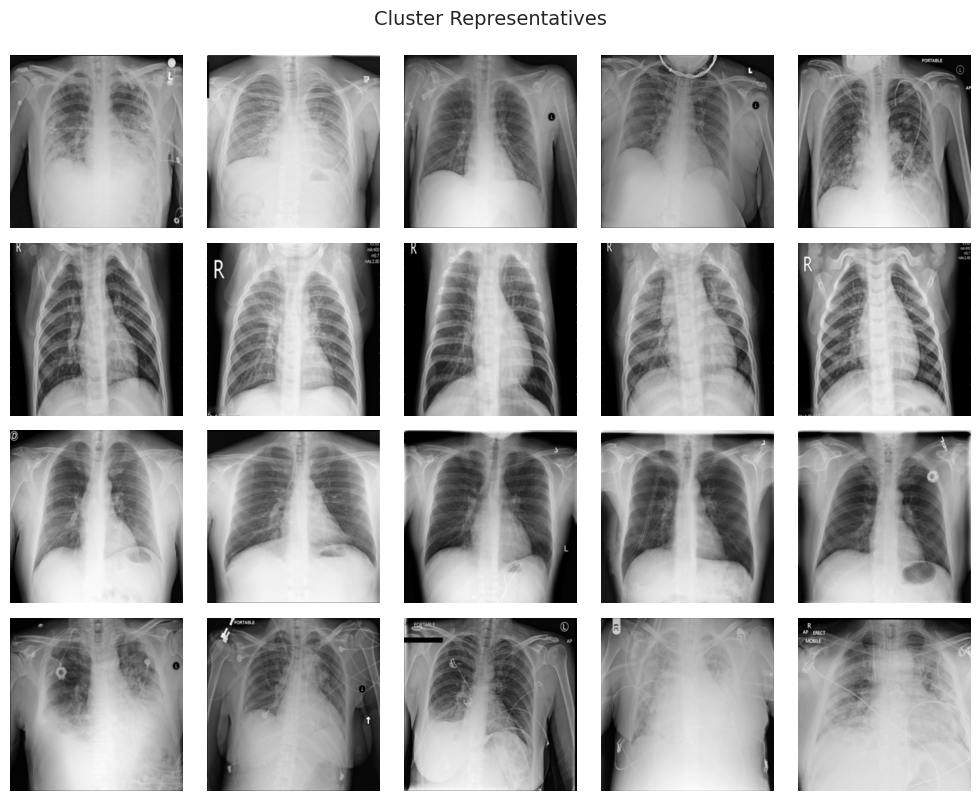

In [8]:
# Import and run pipeline
from src.explorationdata.pipeline.pipeline_runner import EDAPipeline

# Configure pipeline
MAX_IMAGES_PER_CLASS = 100  # Set to a number for testing (e.g., 100), None for full dataset
DEVICE = None  # Auto-detect (will use CUDA if available)

print("Initializing EDA pipeline...")
pipeline = EDAPipeline(
    base_path=BASE_PATH,
    metadata_path=METADATA_PATH,
    output_dir=OUTPUT_DIR,
    seed=SEED,
    device=DEVICE,
    max_images_per_class=MAX_IMAGES_PER_CLASS
)

print("\nRunning full pipeline...")
print("This may take 20+ minutes depending on dataset size and hardware.")
print("Progress will be logged below.\n")

success = pipeline.run_full_pipeline()

if success:
    print("\n" + "="*60)
    print("✓ Pipeline completed successfully!")
    print(f"✓ Results saved to: {pipeline.output_dir}")
    print("="*60)
else:
    print("\n" + "="*60)
    print("✗ Pipeline failed. Check logs for details.")
    print(f"✗ Partial results may be in: {pipeline.output_dir}")
    print("="*60)

## 3. View Results

Let's examine some of the generated outputs.

In [ ]:
# Load summary
import json

summary_path = Path(pipeline.output_dir) / "summary.json"
if summary_path.exists():
    with open(summary_path, 'r') as f:
        summary = json.load(f)

    print("Pipeline Summary:")
    print("="*60)
    print(f"Total images: {summary.get('total_images', 'N/A')}")
    print(f"Corrupted images: {summary.get('corrupted_images', 'N/A')}")
    print(f"Classes: {', '.join(summary.get('classes', []))}")
    print(f"Embedding shape: {summary.get('embedding_shape', 'N/A')}")
    print(f"Total time: {summary.get('total_time_seconds', 0):.2f} seconds")
    print("\nClustering Metrics:")
    if 'kmeans_metrics' in summary:
        km = summary['kmeans_metrics']
        print(f"  KMeans - ARI: {km.get('ari', 0):.3f}, NMI: {km.get('nmi', 0):.3f}")
    if 'dbscan_metrics' in summary:
        db = summary['dbscan_metrics']
        print(f"  DBSCAN - ARI: {db.get('ari', 0):.3f}, NMI: {db.get('nmi', 0):.3f}")
else:
    print("Summary file not found.")

In [ ]:
# Display key figures
from IPython.display import Image, display

figures_dir = Path(pipeline.output_dir) / "figures"

key_figures = [
    "class_distribution.png",
    "sample_grid_random.png",
    "image_mask_overlays.png",
    "pca_scree.png",
    "umap_scatter.png",
    "tsne_scatter.png",
    "inter_class_similarity.png",
    "cluster_representatives.png"
]

for fig_name in key_figures:
    fig_path = figures_dir / fig_name
    if fig_path.exists():
        print(f"\n{'='*60}")
        print(f"Figure: {fig_name}")
        print(f"{'='*60}")
        display(Image(filename=str(fig_path)))
    else:
        print(f"\nFigure not found: {fig_name}")

In [ ]:
# Display key tables
tables_dir = Path(pipeline.output_dir) / "tables"

# Image statistics
stats_path = tables_dir / "image_stats.csv"
if stats_path.exists():
    df_stats = pd.read_csv(stats_path)
    print("Image Statistics (first 10 rows):")
    print("="*60)
    display(df_stats.head(10))

    print("\nSummary Statistics by Class:")
    print("="*60)
    display(df_stats.groupby('class')[['mean', 'std', 'width', 'height']].describe())

# Clustering results
clusters_path = tables_dir / "clusters.csv"
if clusters_path.exists():
    df_clusters = pd.read_csv(clusters_path)
    print("\nClustering Results (first 10 rows):")
    print("="*60)
    display(df_clusters.head(10))

## 4. Conclusion

The complete EDA pipeline has been executed. All results are saved in the output directory:

- **figures/**: All visualizations (PNG files)
- **tables/**: Data tables (CSV files)
- **embeddings.npy**: Deep learning embeddings
- **summary.json**: Pipeline summary with metrics
- **log.txt**: Detailed execution log

### Next Steps:

1. Review the generated visualizations for insights
2. Examine the clustering results and similarity matrices
3. Use the embeddings for downstream tasks (classification, etc.)
4. Iterate on the analysis with different parameters

For questions or issues, please refer to the repository documentation.